In [1]:
import numpy as np
import pandas as pd

from aeon.visualisation import plot_critical_difference
from aeon.visualisation import plot_pairwise_scatter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import MinMaxScaler

import json

# Classification

In [2]:
mlp = pd.read_csv('[END] tsc_mlp.csv')
kan = pd.read_csv('[END] tsc_kan.csv')
fcn = pd.read_csv('[END] tsc_fcn.csv')
fcnkan = pd.read_csv('[END] tsc_fcnkan.csv')
fckan = pd.read_csv('[END] tsc_fckan.csv')

In [3]:
# Primeiro, garanta que todos os DataFrames estejam ordenados pelo nome do dataset
mlp = mlp.sort_values(by='dataset').set_index('dataset')
kan = kan.sort_values(by='dataset').set_index('dataset')
fcn = fcn.sort_values(by='dataset').set_index('dataset')
fcnkan = fcnkan.sort_values(by='dataset').set_index('dataset')
fckan = fckan.sort_values(by='dataset').set_index('dataset')

# Monte o DataFrame metrics usando o índice como nome do dataset
metrics = pd.DataFrame({
    'mlp': mlp['acc'],
    'kan': kan['acc'],
    'fcn': fcn['acc'],
    'fcnkan': fcnkan['acc'],
    'fckan': fckan['acc'],
})

metrics = metrics.dropna(subset=['fckan'])

metrics

,mlp,kan,fcn,fcnkan,fckan
dataset,,,,,
ACSF1,0.270000,0.300000,0.860000,0.910000,0.800000
Adiac,0.158568,0.564103,0.585678,0.838875,0.672634
AllGestureWiimoteX,0.361429,0.266667,0.682857,0.682857,0.664286
AllGestureWiimoteY,0.417143,0.400000,0.770000,0.762857,0.728571
AllGestureWiimoteZ,0.341429,0.316667,0.712857,0.717143,0.597143
...,...,...,...,...,...
Wine,0.500000,1.000000,0.777778,0.907407,0.500000
WordSynonyms,0.448276,0.481482,0.489028,0.517241,0.498433
Worms,0.454545,0.351351,0.779221,0.766234,0.818182


(<Figure size 600x240 with 1 Axes>, <Axes: >)

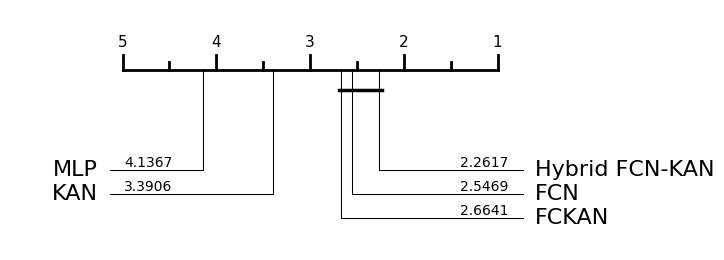

In [4]:
name = {'mlp':'MLP', 'kan':'KAN', 'fcn':'FCN', 'fcnkan':'Hybrid FCN-KAN', 'fckan':'FCKAN'}
metrics.columns = [name[col] for col in metrics.columns]

plot_critical_difference(
    metrics.values,
    metrics.columns.tolist(),
    test='nemenyi',
    lower_better=False,
    alpha=0.05
)

(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='MLP acc\n(mean: 0.6282)', ylabel='KAN acc\n(mean: 0.6658)'>)

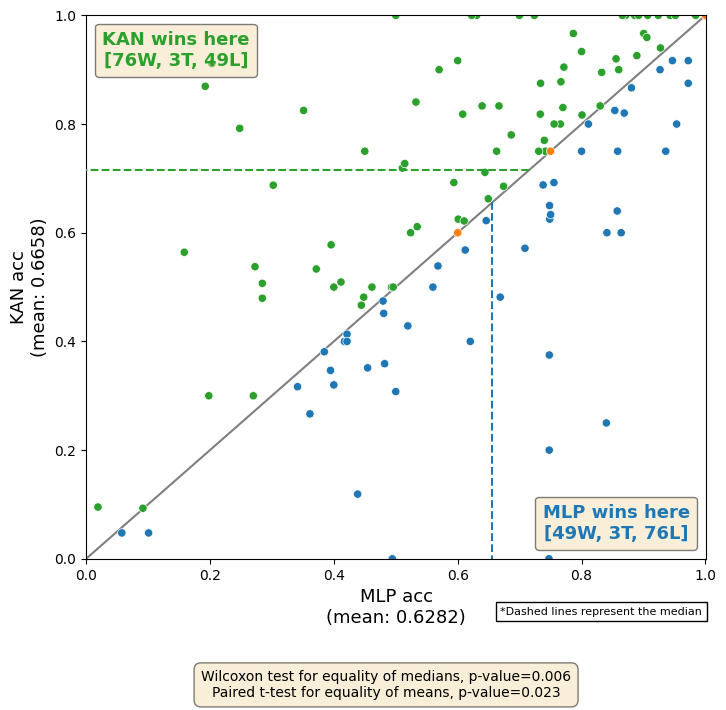

In [5]:
# Plota o scatter plot entre mlp e kan
plot_pairwise_scatter(
    metrics['MLP'].values,
    metrics['KAN'].values,
    method_a='MLP',
    method_b='KAN',
    metric='acc',           # ou 'error', já que RMSE é erro
    lower_better=False        # pois RMSE menor é melhor
)

(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='FCKAN acc\n(mean: 0.7744)', ylabel='Hybrid FCN-KAn acc\n(mean: 0.8023)'>)

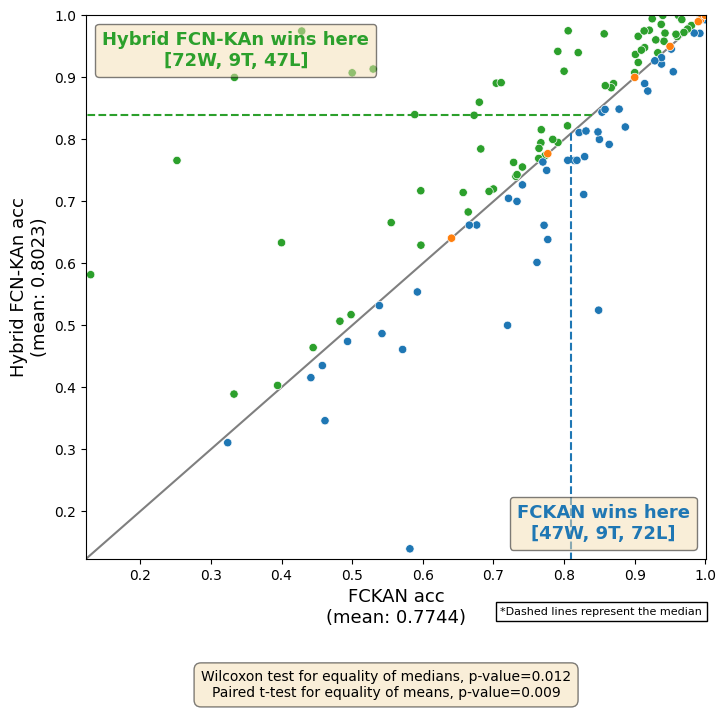

In [6]:
# Plota o scatter plot entre mlp e kan
plot_pairwise_scatter(
    metrics['FCKAN'].values,
    metrics['Hybrid FCN-KAN'].values,
    method_a='FCKAN',
    method_b='Hybrid FCN-KAn',
    metric='acc',           # ou 'error', já que RMSE é erro
    lower_better=False        # pois RMSE menor é melhor
)

# Regression

In [7]:
mlp = pd.read_csv('[END] tser_mlp.csv')
kan = pd.read_csv('[END] tser_kan.csv')
fcn = pd.read_csv('[END] tser_fcn.csv')
fcnkan = pd.read_csv('[END] tser_fcnkan.csv')
fckan = pd.read_csv('[END] tser_fckan.csv')

In [8]:
# Primeiro, garanta que todos os DataFrames estejam ordenados pelo nome do dataset
mlp = mlp.sort_values(by='dataset').set_index('dataset')
kan = kan.sort_values(by='dataset').set_index('dataset')
fcn = fcn.sort_values(by='dataset').set_index('dataset')
fcnkan = fcnkan.sort_values(by='dataset').set_index('dataset')
fckan = fckan.sort_values(by='dataset').set_index('dataset')

# Monte o DataFrame metrics usando o índice como nome do dataset
metrics = pd.DataFrame({
    'mlp': mlp['rmse'],
    'kan': kan['rmse'],
    'fcn': fcn['rmse'],
    'fcnkan': fcnkan['rmse'],
    'fckan': fckan['rmse'],
})

metrics = metrics.dropna(subset=['fckan'])

metrics

,mlp,kan,fcn,fcnkan,fckan
dataset,,,,,
AppliancesEnergy,3.308788,4.572811,3.273215,3.160158,2.869845
AustraliaRainfall,8.312952,6.875358,8.996888,16.425394,8.490897
BIDMC32HR,21.354161,12.830010,11.324030,11.268519,7.664694
BIDMC32RR,4.865735,2.758135,6.199347,4.900728,3.346052
BIDMC32SpO2,21.406084,2.464467,5.772538,5.816784,5.068863
BeijingPM10Quality,119.036237,121.759401,93.826770,93.750219,114.429242
BeijingPM25Quality,93.565383,102.994843,61.722328,60.179320,88.455195
BenzeneConcentration,3.939313,6.468475,4.861716,5.119261,6.950717
Covid3Month,0.045209,24.058531,0.067267,0.046602,0.044118


In [9]:
# ...existing code...

metric_names = ['rmse', 'mse', 'mae', 'r2']
model_files = {
    'mlp': mlp,
    'kan': kan,
    'fcn': fcn,
    'fcnkan': fcnkan,
    'fckan': fckan
}

summary_dict = {}
for model, df in model_files.items():
    stats = {}
    for metric in metric_names:
        values = df.sort_values(by='dataset')[metric]
        stats[(metric, 'mean')] = values.mean()
        stats[(metric, 'std')] = values.std()
    summary_dict[model] = stats

summary_df = pd.DataFrame.from_dict(summary_dict, orient='index')
summary_df.columns = pd.MultiIndex.from_tuples(summary_df.columns)
summary_df
# ...existing code...

rmse                       mse                      mae  \
             mean         std          mean           std       mean   
mlp     40.140301   73.982228   6796.541697  21938.637570  29.400930   
kan     57.499368  137.722894  21275.478413  83633.130081  42.206304   
fcn     18.923032   25.688612    983.254067   2135.402857  12.885555   
fcnkan  26.272643   40.361398   2233.555141   5663.300984  13.962319   
fckan   26.632104   42.055513   2384.847427   5346.763392  18.796271   

                              r2                
               std          mean           std  
mlp      55.732647     -1.175103      4.562016  
kan     102.599036 -15896.980408  69290.710360  
fcn      16.616973     -5.425919     23.261896  
fcnkan   17.545089      0.098644      0.838017  
fckan    29.907385      0.205270      0.333098

In [10]:
metrics

,mlp,kan,fcn,fcnkan,fckan
dataset,,,,,
AppliancesEnergy,3.308788,4.572811,3.273215,3.160158,2.869845
AustraliaRainfall,8.312952,6.875358,8.996888,16.425394,8.490897
BIDMC32HR,21.354161,12.830010,11.324030,11.268519,7.664694
BIDMC32RR,4.865735,2.758135,6.199347,4.900728,3.346052
BIDMC32SpO2,21.406084,2.464467,5.772538,5.816784,5.068863
BeijingPM10Quality,119.036237,121.759401,93.826770,93.750219,114.429242
BeijingPM25Quality,93.565383,102.994843,61.722328,60.179320,88.455195
BenzeneConcentration,3.939313,6.468475,4.861716,5.119261,6.950717
Covid3Month,0.045209,24.058531,0.067267,0.046602,0.044118


(<Figure size 600x240 with 1 Axes>, <Axes: >)

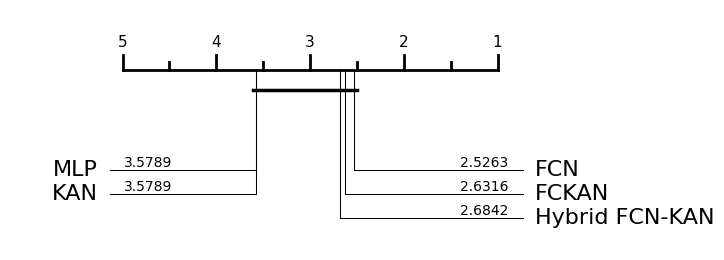

In [11]:
name = {'mlp':'MLP', 'kan':'KAN', 'fcn':'FCN', 'fcnkan':'Hybrid FCN-KAN', 'fckan':'FCKAN'}
metrics.columns = [name[col] for col in metrics.columns]

plot_critical_difference(
    metrics.values,
    metrics.columns.tolist(),
    test='nemenyi',
    lower_better=True,
    alpha=0.05
)

In [12]:
# Prepare the win/tie/loss table
results = pd.DataFrame('', index=name.values(), columns=name.values())

for i_key, i_name in name.items():
    for j_key, j_name in name.items():
        if i_key == j_key:
            results.loc[i_name, j_name] = '-'
        else:
            a = metrics[i_name].values
            b = metrics[j_name].values
            win = (a < b).sum()
            tie = (a == b).sum()
            loss = (a > b).sum()
            results.loc[i_name, j_name] = f"{win} / {tie} / {loss}"

results

,MLP,KAN,FCN,Hybrid FCN-KAN,FCKAN
MLP,-,10 / 0 / 9,6 / 0 / 13,7 / 0 / 12,4 / 0 / 15
KAN,9 / 0 / 10,-,5 / 0 / 14,5 / 0 / 14,8 / 0 / 11
FCN,13 / 0 / 6,14 / 0 / 5,-,10 / 0 / 9,10 / 0 / 9
Hybrid FCN-KAN,12 / 0 / 7,14 / 0 / 5,9 / 0 / 10,-,9 / 0 / 10
FCKAN,15 / 0 / 4,11 / 0 / 8,9 / 0 / 10,10 / 0 / 9,-
